# Predicting Diabetes Onset: A Machine Learning Approach

## About Dataset
### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases (uploaded at Kaggle: [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download)). The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Data Dictionary

| Column Name             | Data Type  | Description                                               |
|-------------------------|------------|-----------------------------------------------------------|
| Outcome                 | Int        | Diabetes (0 = no, 1 = yes) (target)                     |
| Pregnancies             | Int        | Number of times pregnant                                  |
| Glucose                 | Int        | Plasma glucose concentration                             |
| BloodPressure           | Int        | Diastolic blood pressure (mm Hg)                         |
| SkinThickness           | Int        | Triceps skin fold thickness (mm)                         |
| Insulin                 | Int        | 2-hour serum insulin (muU/ml)                            |
| BMI                     | Float      | Body mass index (weight in kg/(height in m)^2)
| DiabetesPedigreeFunction| Float      | Diabetes pedigree function                               |
| Age                     | Int        | Age (years)

# Solution

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pre-processing functions
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyRegressor

# metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn import set_config
set_config(display='diagram')

In [ ]:
# define a function that takes true and predicted values as arguments
# and prints all 4 metrics

def eval_model(true, pred):
  """Takes true and predicted values (arrays) and prints MAE, MSE, RMSE and R2"""
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE {mae},\n MSE {mse},\n RMSE: {rmse},\n R^2: {r2} ')

In [ ]:
# mount data
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the dataset
filename = '/content/drive/MyDrive/diabetes.csv'
df = pd.read_csv(filename)

# Display the first few rows of the DataFrame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Check the shape of the dataset
df.shape

(768, 9)

## Check for Duplicated, Missing, or Erroneous Data

In [ ]:
# Check to see if there are any duplicates
df.duplicated().sum()

0

Seems like there are no duplicates.

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
columns_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

for column in columns_features:
    unique_values = df[column].unique()
    print(f"Unique values for '{column}':", unique_values)


Unique values for 'Pregnancies': [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Unique values for 'Glucose': [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
Unique values for 'BloodPressure': [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
Unique values for 'SkinThickness': [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 

In [ ]:
# Check out data types and missing data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are no missing data and no incorrect data type

## Split the Data

Imputing missing values can leak information from the testing data into the training data, so we impute values after  we split the data.

In [ ]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Imputation

In [ ]:
# Instantiate the selectors for numeric and categorical data types
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

# Select the numeric columns of each type
num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)

# Check the lists of numeric and categorical columns
print('Numeric columns are:', num_columns)
print('Categorical columns are:', cat_columns)

Numeric columns are: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Categorical columns are: []


In [ ]:
# Isolate the numeric columns
df_num = df[num_columns]
# Isolate the columns with missing data
df_num.loc[:, df_num.isna().any()]

""
0
1
2
3
4
...
763
764
765
766


In [ ]:
# Check Features with Missing Data
X_train.isna().any()


Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
dtype: bool

There seems to be no missing data.

## Explore the Data

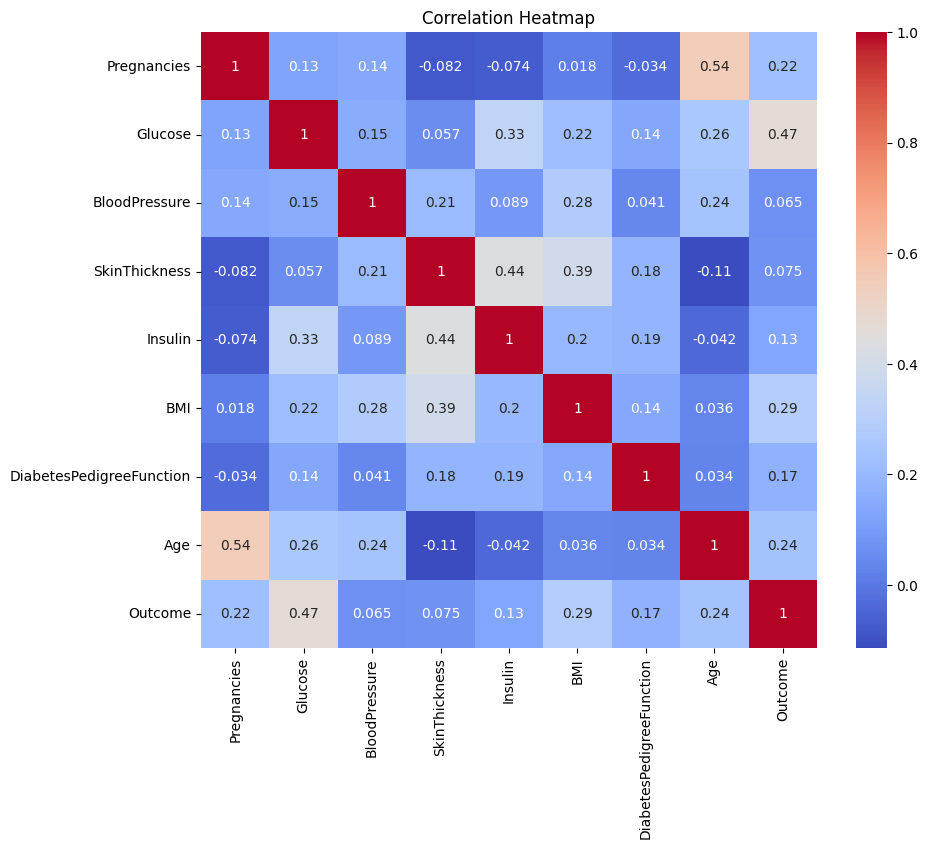

In [ ]:
# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

The graph shows the correlation of the different features of the dataset.  

There seems to be medium correlation between age with pregnancies, and the diabetes with the level of glucose that they have

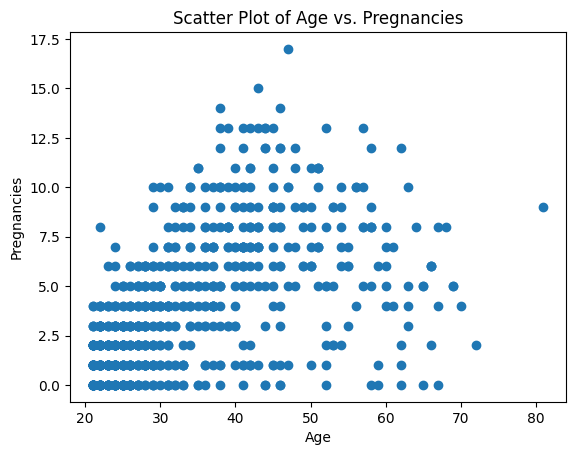

In [ ]:
# Scatter plot of Age vs. Pregnancies
plt.scatter(df['Age'], df['Pregnancies'])
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.title('Scatter Plot of Age vs. Pregnancies')
plt.show()


This scatter plot shows the relationship between the 'Age' and 'Pregnancies' variables. Each point represents a data point from the dataset, with the x-axis representing the 'Age' values and the y-axis representing the 'Pregnancies' values.

The graph shows that between mid 30-40 to 50, the number of pregnancies increases as the age increases. After 50, the number of pregnancies goes down again.

## Further Model Preparation

In [ ]:
#instantiate the encoder
scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
# Setup Tuples
num_tuple = (scaler, num_selector)
cat_tuple = (encoder, cat_selector)

### ColumnTransformer

In [ ]:
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [ ]:
preprocessor.fit(X_train, y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7aab6f7751b0>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7aab6f7775e0>)])

In [ ]:
# transform the processed data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## Baseline Model

Establish a base model for basis of comparison.

In [ ]:
# instantiate and fit a baseline regression model
dummy_reg = DummyRegressor(strategy = 'mean')


In [ ]:
dummy_reg.fit(X_train_processed, y_train)


DummyRegressor()

In [ ]:
# find MAE, MSE, RMSE and R2 on the baseline model for both the train and test data
trained_score = dummy_reg.score(X_train_processed, y_train)
print(f"Train Score: {trained_score}")

trained_score = dummy_reg.score(X_test_processed, y_test)
print(f"Test Score: {trained_score}")


Train Score: 0.0
Test Score: -0.0008378827749631057


In [ ]:
# show results of  prediction
# show results of prediction
print('Base model training evaluation')
eval_model(y_train, dummy_reg.predict(X_train_processed))
print('Base model testing evaluation')
eval_model(y_test,
dummy_reg.predict(X_test_processed))

Base model training evaluation
MAE 0.4522509162808641,
 MSE 0.22612545814043208,
 RMSE: 0.47552650624379716,
 R^2: 0.0 
Base model testing evaluation
MAE 0.45654296875,
 MSE 0.23041751060956792,
 RMSE: 0.4800182398717448,
 R^2: -0.0008378827749631057 


Will be comparing with Linear Regression and Decision Tree Regressor.

## Linear Regression Model with Pipeline

In [ ]:
# instantiate a linear regression model
linear_model = LinearRegression()


In [ ]:
linear_model.fit(X_train_processed, y_train)


LinearRegression()

In [ ]:
# find MAE, MSE, RMSE and R2 on the linear regression model for both the train and test data
training_score = linear_model.score(X_train_processed, y_train)
print(f'train score {training_score}')
testing_score = linear_model.score (X_test_processed, y_test)
print(f'test score {testing_score}')

train score 0.31731541035601274
test score 0.22116061834901646


In [ ]:
print('Base model training evaluation')
eval_model(y_train, linear_model.predict(X_train_processed))
print("\n Base model testing evaluation")
eval_model(y_test,
linear_model.predict(X_test_processed))

Base model training evaluation
MAE 0.32664525088326835,
 MSE 0.1543723655986595,
 RMSE: 0.3929024886643752,
 R^2: 0.31731541035601274 

 Base model testing evaluation
MAE 0.35744015946441626,
 MSE 0.17930799240646422,
 RMSE: 0.42344774459957185,
 R^2: 0.22116061834901646 


## Decision Tree Regressor

In [ ]:
# instantiate a linear regression model
decision_tree_model = DecisionTreeRegressor()


In [ ]:
decision_tree_model.fit(X_train_processed, y_train)


DecisionTreeRegressor()

In [ ]:
# find MAE, MSE, RMSE and R2 on the decision tree regressor model for both the train and test data
training_score = decision_tree_model.score(X_train_processed, y_train)
print(f'train score {training_score}')
testing_score = decision_tree_model.score (X_test_processed, y_test)
print(f'test score {testing_score}')

train score 1.0
test score -0.40261576528808773


In [ ]:
print('Base model training evaluation')
eval_model(y_train, decision_tree_model.predict(X_train_processed))
print("\n Base model testing evaluation")
eval_model(y_test,
decision_tree_model.predict(X_test_processed))

Base model training evaluation
MAE 0.0,
 MSE 0.0,
 RMSE: 0.0,
 R^2: 1.0 

 Base model testing evaluation
MAE 0.3229166666666667,
 MSE 0.3229166666666667,
 RMSE: 0.568257570707744,
 R^2: -0.40261576528808773 


In [ ]:
# Looking at options for tuning this model
decision_tree_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# Tuning one hyperparameter for now

In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 36)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

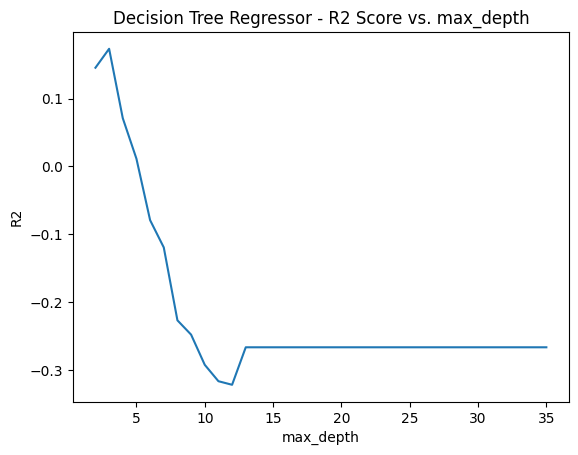

In [ ]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');
plt.title('Decision Tree Regressor - R2 Score vs. max_depth')
plt.show()
# Looks like 3 has the best R^2.

In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 15)) # will try every value between 1 and 15
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

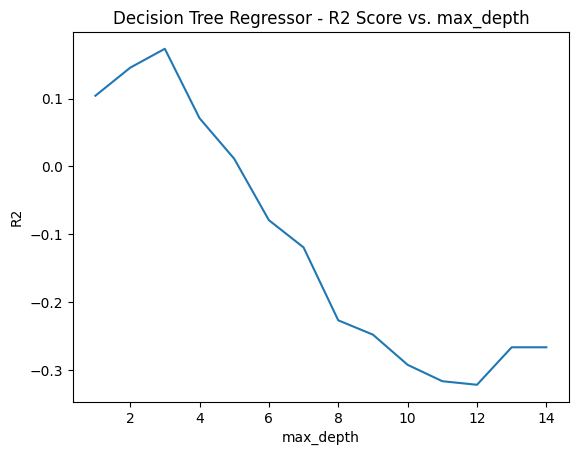

In [ ]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');
plt.title('Decision Tree Regressor - R2 Score vs. max_depth')
plt.show()
# Looks like 3 has the best R^2.

The max depth best for this seems to be a clear "3".

In [ ]:
# Let's run the model with our optimized value for max_depth
dec_tree_3 = DecisionTreeRegressor(max_depth = 3, random_state = 42)
dec_tree_3.fit(X_train_processed, y_train)
train_3_score = dec_tree_3.score(X_train_processed, y_train)
test_3_score = dec_tree_3.score(X_test_processed, y_test)
print(train_3_score)
print(test_3_score)
# There is a slightly smaller difference between predicted values and the hypothesis; highest R^2 we can get

0.35863638655181374
0.17343965603076061


In [ ]:
# find MAE, MSE, RMSE and R2 on the decision tree regressor model for both the train and test data
training_score = dec_tree_3.score(X_train_processed, y_train)
print(f'train score {training_score}')
testing_score = dec_tree_3.score(X_test_processed, y_test)
print(f'test score {testing_score}')

train score 0.35863638655181374
test score 0.17343965603076061


In [ ]:
print('Decision Tree Regressor training evaluation')
eval_model(y_train, dec_tree_3.predict(X_train_processed))
print("\n Decision Tree Regressor testing evaluation")
eval_model(y_test, dec_tree_3.predict(X_test_processed))

Decision Tree Regressor training evaluation
MAE 0.2900572818511482,
 MSE 0.1450286409255741,
 RMSE: 0.3808262608140018,
 R^2: 0.35863638655181374 

 Decision Tree Regressor testing evaluation
MAE 0.3435987865331877,
 MSE 0.19029453231518378,
 RMSE: 0.4362276152597217,
 R^2: 0.17343965603076061 


Based on the evaluation metrics provided (R2 score and other evaluation metrics), it appears that the model with max_depth of 3 performs better than the base model in terms of fit.

## Compare both models


In [ ]:
models = [
    ('Linear Regression', linear_model),
    ('Decision Tree (max_depth=3)', dec_tree_3)
]

metrics = {}

for model_name, model in models:
    train_pred = model.predict(X_train_processed)
    test_pred = model.predict(X_test_processed)

    mae_train = mean_absolute_error(y_train, train_pred)
    mae_test = mean_absolute_error(y_test, test_pred)
    mse_train = mean_squared_error(y_train, train_pred)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(y_train, train_pred)
    r2_test = r2_score(y_test, test_pred)

    metrics[model_name] = {
        'MAE (Train)': mae_train,
        'MAE (Test)': mae_test,
        'MSE (Train)': mse_train,
        'MSE (Test)': mse_test,
        'RMSE (Train)': rmse_train,
        'RMSE (Test)': rmse_test,
        'R2 (Train)': r2_train,
        'R2 (Test)': r2_test
    }

# Create a DataFrame from the metrics dictionary
df_metrics = pd.DataFrame(metrics)

# Display the DataFrame
print(df_metrics)


              Linear Regression  Decision Tree (max_depth=3)
MAE (Train)            0.326645                     0.290057
MAE (Test)             0.357440                     0.343599
MSE (Train)            0.154372                     0.145029
MSE (Test)             0.179308                     0.190295
RMSE (Train)           0.392902                     0.380826
RMSE (Test)            0.423448                     0.436228
R2 (Train)             0.317315                     0.358636
R2 (Test)              0.221161                     0.173440


## Summary

In this comparison between a Linear Regression model and a Decision Tree model with a maximum depth of 3, the following key observations can be made:

*   On the training dataset, the Decision Tree model outperforms the Linear Regression model in terms of Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). This suggests that the Decision Tree model has lower training errors and better accuracy in capturing the training data.

*   On the testing dataset, the performance of the two models is relatively close. The Linear Regression model has a slightly higher MAE, while the Decision Tree model has a slightly higher MSE and RMSE. This indicates that both models perform similarly on unseen data, with neither model showing a clear advantage.

*   When it comes to the R-squared (R2) metric, which measures how well the models fit the data, the Decision Tree model has a higher R2 score on the training dataset, indicating a better fit to the training data. However, the Linear Regression model has a slightly higher R2 score on the testing dataset, suggesting slightly better generalization to new data.

*   Overall, the Decision Tree model with a maximum depth of 3 exhibits better training performance, while the Linear Regression model shows slightly better generalization to the testing data. The choice between these models should be made based on the specific requirements of the task and the trade-offs between training and testing performance.